训练神经网络主要围绕的方面：
1. 层，多个层组合成网络（模型）；
2. 输入数据和相应的目标；
3. 损失函数，即用于学习的反馈信号；
4. 优化器，决定学习过程如何进行。

_________
层兼容性：指每一层只接受特定形状的输入张量，并返回特定形状的输出张量。在Keras中，无须担心兼容性，因为向模型中添加的层都会自动匹配输入层的形状。

- 对于二分类问题，可使用二元交叉熵（binary crossentropy）损失函数；
- 对于多分类问题，可使用分类交叉熵（categorical crossentropy）损失函数；
- 对于回归问题，可使用均方误差（mean-squared error）损失函数；
- 对于序列学习问题，可使用联结主义时序分类（CTC，connectionist temporal classification）损失函数。

______
哪种类型的网络架构适合解决哪种类型的问题？如何选择正确的学习配置？如何调节模型使其给出你想要的结果？

#### 电影评论分类_二分类

In [33]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [34]:
train_data.shape

(25000,)

- 将评论解码为英文单词

In [35]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

将数据转换为张量：
1. 填充列表，使其具有相同的长度，再将列表转换成形状为(samples, word_indices)的整数张量，然后网络第一层使用能处理这种整数张量的层，如Embedding层。
2. 对列表进行one-hot编码，将其转换为0和1组成的向量，然后网络第一层可以用Dense层。

In [36]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [37]:
x_train.shape

(25000, 10000)

In [38]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

如果没有relu等激活函数（也叫非线性），Dense层将只包含两个线性运算——点积和加法。这样Dense层就只能学习输入数据的线性变换（仿射变换）。这种假设空间非常有限，无法利用多个表示层的优势，因为多个线性层堆叠实现的仍是线性运算，添加层数并不会扩展假设空间。

In [39]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [41]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 505us/step - loss: 0.5420 - acc: 0.7512 - val_loss: 0.2939 - val_acc: 0.8838
Epoch 2/20
15000/15000 [==============================] - 6s 412us/step - loss: 0.2646 - acc: 0.8964 - val_loss: 0.2723 - val_acc: 0.8884
Epoch 3/20
15000/15000 [==============================] - 6s 417us/step - loss: 0.1535 - acc: 0.9428 - val_loss: 0.2962 - val_acc: 0.8887
Epoch 4/20
15000/15000 [==============================] - 6s 413us/step - loss: 0.0823 - acc: 0.9717 - val_loss: 0.3629 - val_acc: 0.8897
Epoch 5/20
15000/15000 [==============================] - 6s 418us/step - loss: 0.1166 - acc: 0.9764 - val_loss: 0.3326 - val_acc: 0.8885
Epoch 6/20
15000/15000 [==============================] - 6s 416us/step - loss: 0.0048 - acc: 0.9996 - val_loss: 0.4795 - val_acc: 0.8888
Epoch 7/20
15000/15000 [==============================] - 6s 422us/step - loss: 7.0267e-04 - acc: 1.0000 - val_loss: 0.568

In [42]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

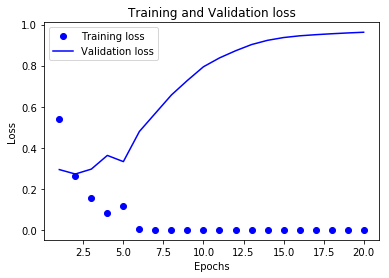

In [43]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

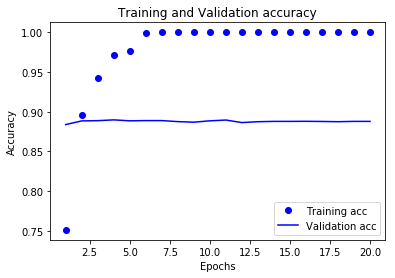

In [44]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 124us/step - loss: 0.1024 - acc: 0.9719
Epoch 2/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.0869 - acc: 0.9758
Epoch 3/4
25000/25000 [==============================] - 3s 122us/step - loss: 0.0732 - acc: 0.9799
Epoch 4/4
25000/25000 [==============================] - 3s 118us/step


In [19]:
results

[0.7063647517418862, 0.84888]

In [20]:
model.predict(x_test)

array([[0.00279619],
       [1.        ],
       [0.31160048],
       ...,
       [0.0890286 ],
       [0.03354254],
       [0.152453  ]], dtype=float32)

1. 需对原数据进行大量预处理，以便将其转换为张量输入到神经网络中。
2. 对于二分类问题，网络的最后一层应该是只有一个单元并使用sigmoid激活的Dense层，网络输出应该是$0~1$范围内的标量，表示概率值。
3. 一定要一直监控模型在训练集之外的数据上的性能。

______
#### 新闻分类_单标签、多分类

In [51]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [52]:
train_data.shape

(8982,)

In [53]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [54]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [55]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

In [56]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 364us/step - loss: 2.1287 - acc: 0.5084 - val_loss: 1.4287 - val_acc: 0.6750
Epoch 2/20
7982/7982 [==============================] - 2s 256us/step - loss: 1.4480 - acc: 0.6713 - val_loss: 1.2106 - val_acc: 0.7230
Epoch 3/20
7982/7982 [==============================] - 2s 255us/step - loss: 1.2106 - acc: 0.7220 - val_loss: 1.1075 - val_acc: 0.7580
Epoch 4/20
7982/7982 [==============================] - 2s 258us/step - loss: 1.0662 - acc: 0.7581 - val_loss: 1.0776 - val_acc: 0.7660
Epoch 5/20
7982/7982 [==============================] - 2s 254us/step - loss: 0.9297 - acc: 0.7818 - val_loss: 1.0128 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 2s 256us/step - loss: 0.8333 - acc: 0.8051 - val_loss: 0.9998 - val_acc: 0.7980
Epoch 7/20
7982/7982 [==============================] - 2s 255us/step - loss: 0.7624 - acc: 0.8218 - val_loss: 1.0000 - val_acc: 0.7980


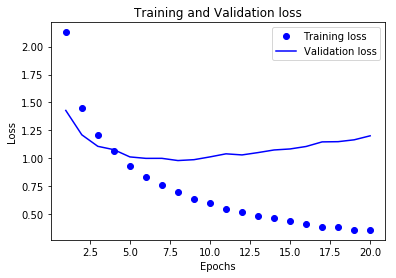

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

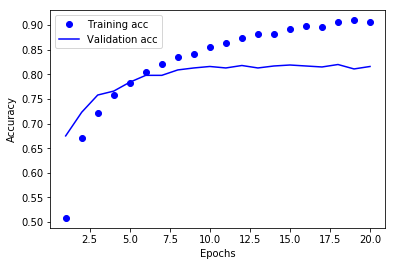

In [59]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, one_hot_train_labels, epochs=5, batch_size=128)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/5
8982/8982 [==============================] - 3s 281us/step - loss: 1.5861 - acc: 0.6539
Epoch 2/5
8982/8982 [==============================] - 2s 231us/step - loss: 0.8217 - acc: 0.8161
Epoch 3/5
8982/8982 [==============================] - 2s 232us/step - loss: 0.5079 - acc: 0.8907
Epoch 4/5
8982/8982 [==============================] - 2s 233us/step - loss: 0.3364 - acc: 0.9272
Epoch 5/5
2246/2246 [==============================] - 1s 236us/step


In [60]:
results

[1.1229057339611377, 0.7818343722172751]

In [61]:
predictions = model.predict(x_test)

1. 若对$N$个类别的数据点进行分类，网络的最后一层应该是大小为$N$的Dense层。

处理多分类问题的标签的方法：
1. 通过分类编码（one-hot编码）对标签进行编码，然后使用categorical_crossentropy作为损失函数；
2. 将标签编码为整数，然后使用sparse_categorical_crossentropy损失函数。

如果需要将数据划分到许多类别中，应避免使用太小的中间层，以免在网络中造成信息瓶颈。

______
#### 预测房价_回归问题

In [3]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [4]:
train_data.shape

(404, 13)

对每个特征做标准化，即对于输入数据的每个特征（输入数据矩阵中的列），减去特征平均值、再除以标准差，这样得到的特征平均值为0，标准差为1。

- 用于测试数据标准化的均值和标准差都是在训练数据上计算得到的。在工作流程中，你不能使用在测试数据上计算得到的任何结果，即使是像数据标准化这么简单的事情也不行。

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [6]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

由于数据点很少，验证集会非常小。验证集的划分方式可能会造成验证分数上有很大的方差，这样就无法对模型进行可靠的评估。此时，最佳做法是使用**K折交叉验证**。
> 将可用数据划分为K（取4、或5）个分区，实例化K个相同的模型，将每个模型在K-1个分区上训练，并在剩下的一个分区上进行评估。模型的验证分数等于K个验证分数的平均值。

In [21]:
import numpy as np

# 训练500轮次，并记录模型在每轮的表现
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold ', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0, validation_data=(val_data, val_targets))
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold  0
processing fold  1
processing fold  2
processing fold  3


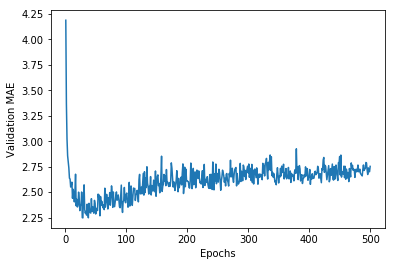

In [28]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

1. 删除前10个数据点，因为它们的取值范围与曲线上的其他点不同；
2. 将每个数据点替换为前面数据点的指数移动平均值，以得到光滑的曲线。

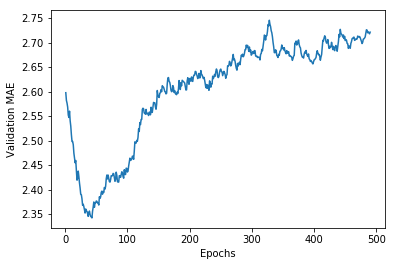

In [29]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [31]:
model = build_model()
model.fit(train_data, train_targets, epochs=40, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [32]:
test_mae_score

2.94465269761927

1. 如果可用的训练数据很少，最好使用隐藏层较少（通常只有一到两个）的小型网络，以避免严重的过拟合。